# Business Understanding

## Introduction:
In the pursuit of enhancing healthcare outcomes and patient care, this project aims to develop a predictive model for the early detection of sepsis. 

Sepsis is a life-threatening condition that arises when the body's response to infection causes organ dysfunction. 
Timely identification and intervention are crucial for improving patient outcomes.

This project aligns with the CRISP-DM framework, emphasizing a structured and iterative approach to developing a robust sepsis prediction model.

### CRISP-DM Framework:
1. Business Understanding:
Understand the clinical context, the impact of sepsis on patient outcomes, and the requirements of healthcare professionals. Define the goals and success criteria for the project.

2. Data Understanding:
Explore the dataset to gain insights into the variables, their distributions, and potential relationships. Identify any missing or outlier values that may impact model performance.

3. Data Preparation:
Preprocess the data, handle missing values, encode categorical variables, and scale features as needed. Prepare the dataset for model training and evaluation.

4. Modeling:
Select appropriate machine learning algorithms and train multiple models. Tune hyperparameters to optimize performance and ensure the robustness of the chosen model.

5. Evaluation:
Assess the model's performance using metrics such as accuracy, precision, recall, and F1 score. Validate the model on a separate dataset to gauge its generalization capabilities.

6. Deployment:
Implement the model into a system that healthcare professionals can use for sepsis risk assessment. Provide necessary documentation for seamless integration into clinical workflows.

7. Monitoring and Maintenance:
Establish mechanisms for ongoing model monitoring, ensuring continued accuracy and relevance. Address any drift in data distribution and update the model as needed.



## Background:
Sepsis is a critical concern in healthcare, with its early diagnosis posing a significant challenge. 

Machine learning offers a promising avenue for developing models that can assist medical professionals in identifying patients at risk of developing sepsis. 

By leveraging a dataset comprising various patient attributes, we aim to construct a predictive model that can accurately classify the presence or absence of sepsis.

## Objectives:
* Develop a Predictive Model: Employ machine learning techniques to build a model capable of predicting sepsis based on patient data.
* Develop FastAPI for deployment of the model.

## Hypothesis

`Null Hypothesis (H0)`:

There is no association between Age and the likelihood of developing Sepsis.


`Alternative Hypothesis (H1)`:

There is a significant association between Age and the likelihood of developing Sepsis.

# Data Understanding


To understand our data needs for this project, we have to load and critically examine features and other properties of the data.

We therefore load the Python libraries that are necessary for this work.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

import joblib

In [34]:
# Load data and inspect the first five rows.
train = pd.read_csv("./data/Paitients_Files_Train.csv")
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


After critical inspection of the dataset, we researched about the variables and other general information. We therefore came out with the following:

`PRG` (Plasma Glucose): High plasma glucose levels may be associated with conditions like diabetes, and such conditions could potentially contribute to an increased risk of sepsis..

`PL` (Glucose): Elevated glucose levels could be indicative of metabolic dysfunction, which may be associated with an increased risk of infection and sepsis.

`PR` (Blood Pressure): Diastolic blood pressure is a crucial cardiovascular indicator. Abnormalities in blood pressure may signal systemic issues, including potential infection.

`SK` (Skin Thickness): Triceps skinfold thickness could be related to the patient's overall nutritional status and body composition. Malnutrition may affect the immune system and increase susceptibility to infections.

`TS` (Insulin): Abnormal insulin levels may be associated with underlying metabolic conditions, which could impact the body's ability to respond to infections.

`M11` (BMI): Body Mass Index is a measure of body fat and may indicate whether a patient is underweight, normal weight, overweight, or obese. BMI is linked to overall health, and extremes in either direction may affect the immune system.

`BD2` (Diabetes Pedigree Function): This function provides a measure of the genetic influence of diabetes. Genetic factors can contribute to overall health and may influence the risk of developing conditions, including sepsis.

`Age`: Age is a critical factor, as the risk of sepsis tends to increase with age. Older individuals may have weakened immune systems or pre-existing health conditions that make them more susceptible to infections.

`Insurance`: While not a direct health indicator, insurance status may indirectly reflect the patient's access to healthcare. <br>Timely access to medical care can impact the management of infections and reduce the risk of sepsis.

These features collectively provide a diverse set of information about the patient's health, lifestyle, and potential risk factors.<br>
 Machine learning models, such as logistic regression or decision trees, can analyze these features to identify patterns associated with the likelihood of sepsis. <br>The goal is to train a model that can generalize from the known cases in the dataset to predict sepsis accurately in new, unseen cases based on their feature values.


### Data Assessment

In [6]:
# Rename columns
new_column_names = {
    'PRG': 'Plasma Glucose',
    'PL': 'Elevated Glucose',
    'PR': 'Diastolic Blood Pressure',
    'SK': 'Triceps Skinfold Thickness',
    'TS': 'Insulin Levels',
    'M11': 'Body Mass Index (BMI)',
    'BD2': 'Diabetes Pedigree Function',
    'Age': 'Age',
    'Insurance': 'Insurance',
    'Sepssis': 'Sepsis'
}

train = train.rename(columns=new_column_names)

In [7]:
# Check Non-nulls and data type of each feature and memory used.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          599 non-null    object 
 1   Plasma Glucose              599 non-null    int64  
 2   Elevated Glucose            599 non-null    int64  
 3   Diastolic Blood Pressure    599 non-null    int64  
 4   Triceps Skinfold Thickness  599 non-null    int64  
 5   Insulin Levels              599 non-null    int64  
 6   Body Mass Index (BMI)       599 non-null    float64
 7   Diabetes Pedigree Function  599 non-null    float64
 8   Age                         599 non-null    int64  
 9   Insurance                   599 non-null    int64  
 10  Sepsis                      599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [8]:
# Get a statistical summary for data.
train.describe()

,Plasma Glucose,Elevated Glucose,Diastolic Blood Pressure,Triceps Skinfold Thickness,Insulin Levels,Body Mass Index (BMI),Diabetes Pedigree Function,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Print the unique values and their counts for each feature.

for col in train.columns:
    print(f'\n{col}------->{train[col].value_counts()}\n\n')


ID------->ICU200010    1
ICU200404    1
ICU200406    1
ICU200407    1
ICU200408    1
            ..
ICU200210    1
ICU200211    1
ICU200212    1
ICU200213    1
ICU200608    1
Name: ID, Length: 599, dtype: int64



Plasma Glucose------->1     100
0      93
2      76
3      59
4      54
5      49
7      37
6      37
8      32
9      20
10     16
12      8
11      7
13      7
14      2
15      1
17      1
Name: Plasma Glucose, dtype: int64



Elevated Glucose------->100    15
99     14
125    11
95     11
105    11
       ..
44      1
191     1
183     1
160     1
67      1
Name: Elevated Glucose, Length: 129, dtype: int64



Diastolic Blood Pressure------->70     46
68     41
74     38
72     37
64     37
78     31
80     30
66     29
76     29
0      28
62     26
60     26
82     22
90     20
84     19
88     15
86     14
58     13
50     10
56     10
52      8
54      8
75      7
92      7
85      6
65      6
48      5
98      3
44      3
96      3
110     3
108     2
55      2
30    

In [10]:
# Check for number of duplicates

train.duplicated().sum()

0

In [11]:
# Check for missing values

train.isnull().sum()

ID                            0
Plasma Glucose                0
Elevated Glucose              0
Diastolic Blood Pressure      0
Triceps Skinfold Thickness    0
Insulin Levels                0
Body Mass Index (BMI)         0
Diabetes Pedigree Function    0
Age                           0
Insurance                     0
Sepsis                        0
dtype: int64

# Analytical Questions

1. How does the distribution of sepsis cases differ between patients with insurance and those without insurance?

2. Is there an observable trend in sepsis risk based on the levels of insulin (TS) and the associated pedigree function (BD2) in the dataset?

3. Is there any correlation between age and the likelihood of developing sepsis?

4. Does age contribute significantly to the influence of other factors on sepsis development?

5. Is there a correlation between patients' BMI and the outcome of sepsis?

## Exploratory Data Analysis

### Univariate Analysis

In [12]:

def plot_univariate_analysis(df, cols_to_plot):
    # Create subplots based on the number of columns to be plotted
    fig, axes = plt.subplots(nrows=len(cols_to_plot), figsize=(12, 6 * len(cols_to_plot)))

    # Loop through each column for univariate analysis
    for i, col in enumerate(cols_to_plot):
        # Select the current subplot
        ax = axes[i]

        # Plot histogram with KDE (Kernel Density Estimate)
        sns.histplot(data=df, x=col, kde=True, ax=ax, fill=True)
        
        # Set x-axis and y-axis labels
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        ax.set_title(f'Univariate Analysis of {col}')

        # Calculate and display mean, skewness, and kurtosis
        mean_val = df[col].mean()
        skewness_val = df[col].skew()
        kurtosis_val = df[col].kurtosis()

        ax.text(0.65, 0.9, f'Mean: {mean_val:.2f}', transform=ax.transAxes)
        ax.text(0.65, 0.8, f'Skewness: {skewness_val:.2f}', transform=ax.transAxes)
        ax.text(0.65, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=ax.transAxes)

        # Draw a vertical dashed line at the mean
        ax.axvline(mean_val, color='red', linestyle='--', label='Mean')

        # Identify potential outliers
        outliers = df[(df[col] > mean_val + 3 * df[col].std()) | (df[col] < mean_val - 3 * df[col].std())]
        
        # Plot potential outliers in red
        ax.plot(outliers[col], [0] * len(outliers), 'ro', label='Potential Outliers')

        # Display legend
        ax.legend()

    # Adjust layout for better visualization
    plt.tight_layout()

    # Show the plot
    plt.show()

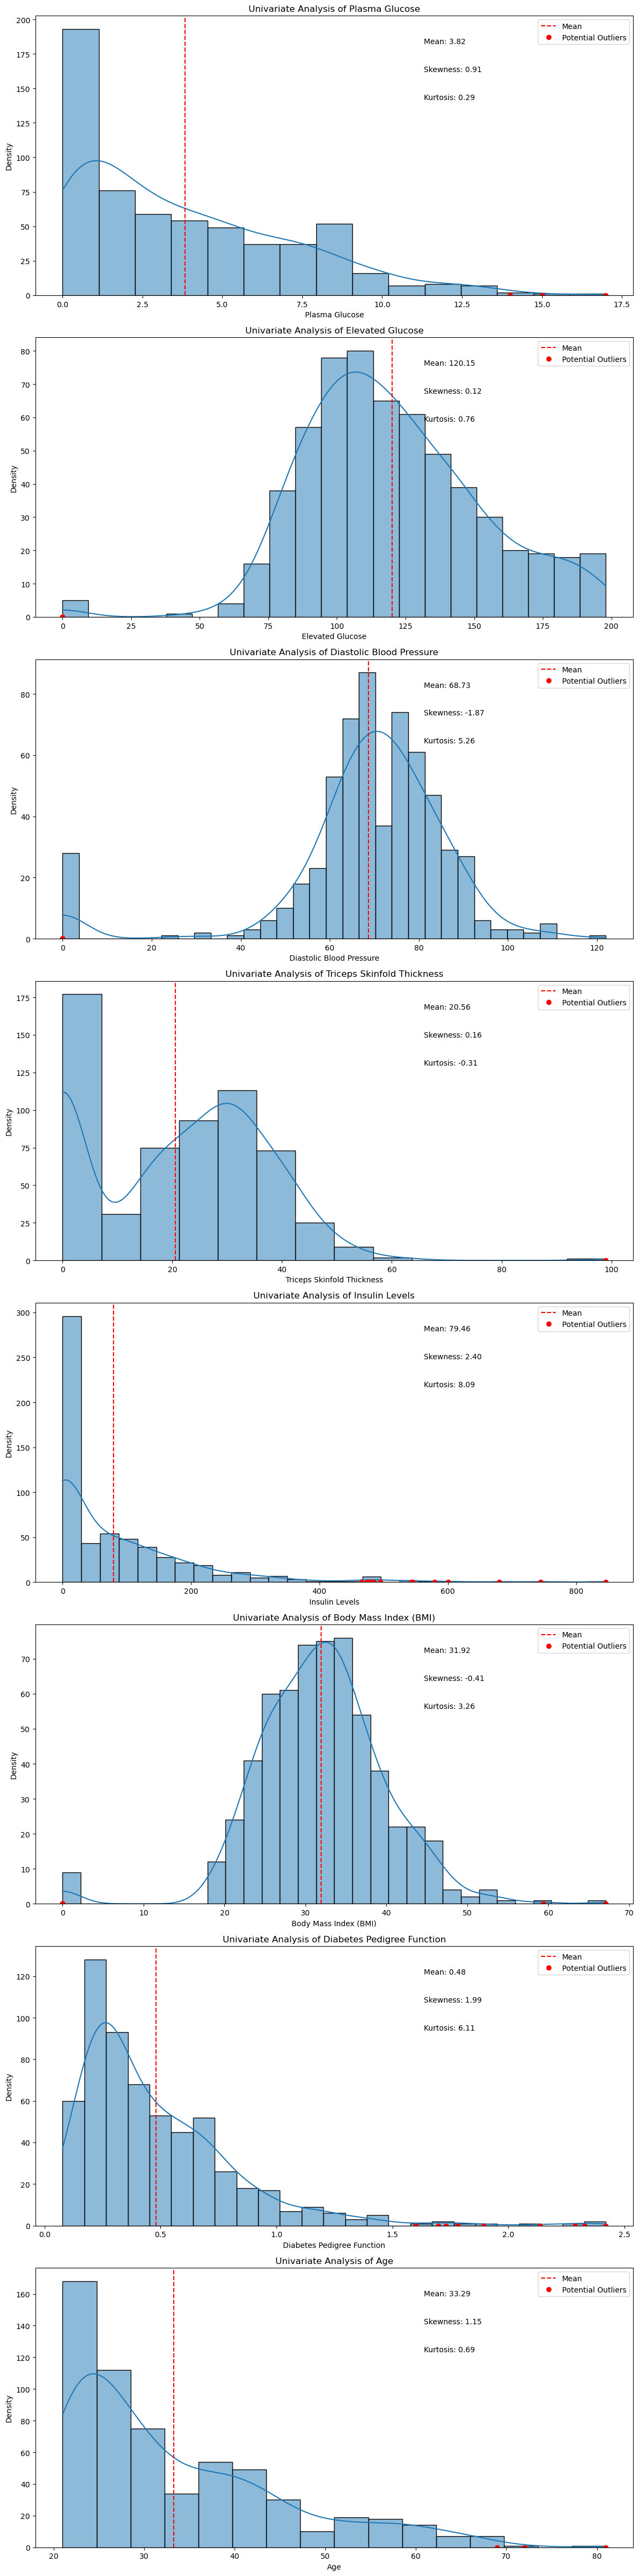

In [13]:
# Plot the diagrams by invoking the function plot_univariate_analysis()
plot_univariate_analysis(train, ['Plasma Glucose', 'Elevated Glucose', 'Diastolic Blood Pressure', 'Triceps Skinfold Thickness', 'Insulin Levels', 'Body Mass Index (BMI)', 'Diabetes Pedigree Function', 'Age'])

In [14]:
# Function to plot the distribution of the target variable and the Insurance column
def plot_distribution(data, column, title):
    plt.figure(figsize=(12, 8))
    sns.histplot(data[column])

    for rect in plt.gca().patches:
        height = rect.get_height()
        plt.gca().annotate(f'{height:.0f}', 
                           xy=(rect.get_x() + rect.get_width() / 2, height),
                           xytext=(0, 3),  # 3 points vertical offset
                           textcoords="offset points",
                           ha='center')

    plt.title(f'Distribution of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

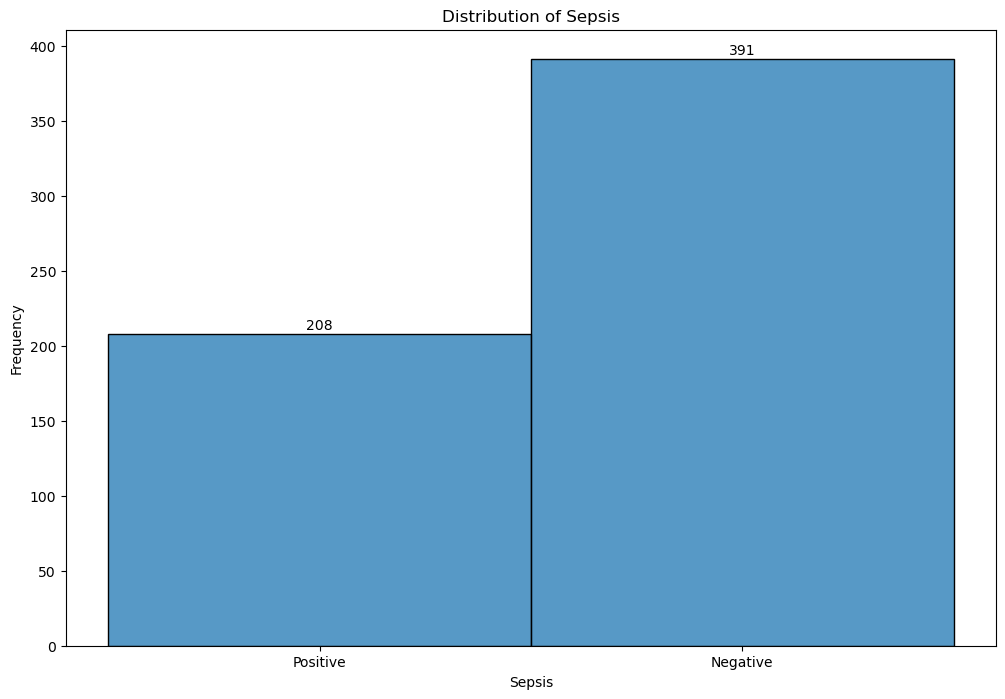

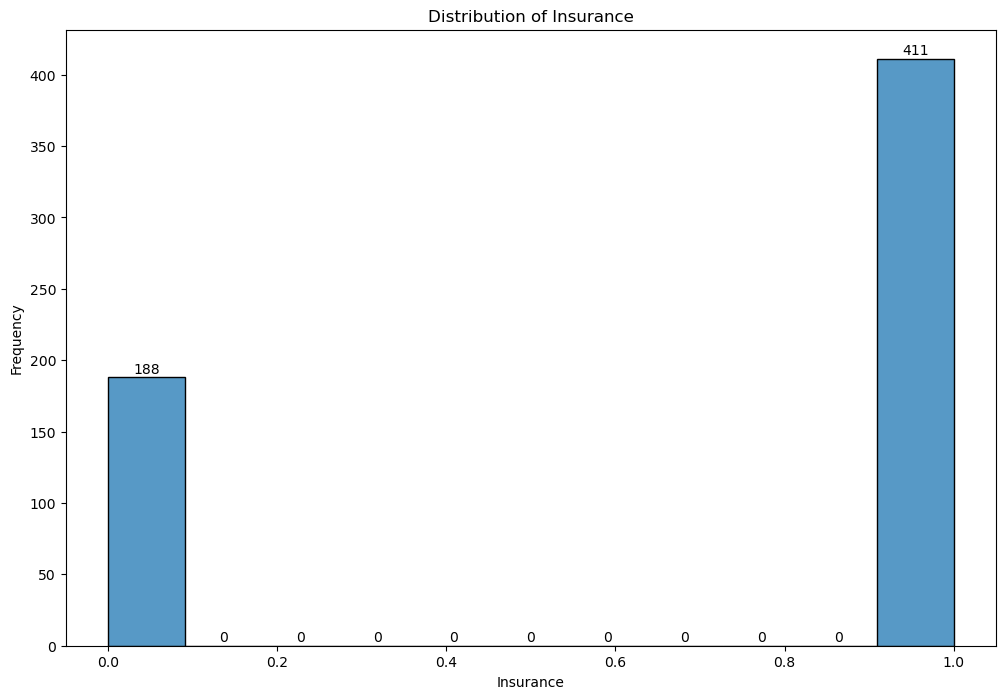

In [15]:
# Plot the distribution of Sepsis and Insurance columns by invoking the function plot_distribution()
plot_distribution(train, 'Sepsis', 'Sepsis')
plot_distribution(train, 'Insurance', 'Insurance')

## Bivariate Analysis

## Answering the analytical questions

1.  ### How does the distribution of sepsis cases differ between patients with insurance and those without insurance?

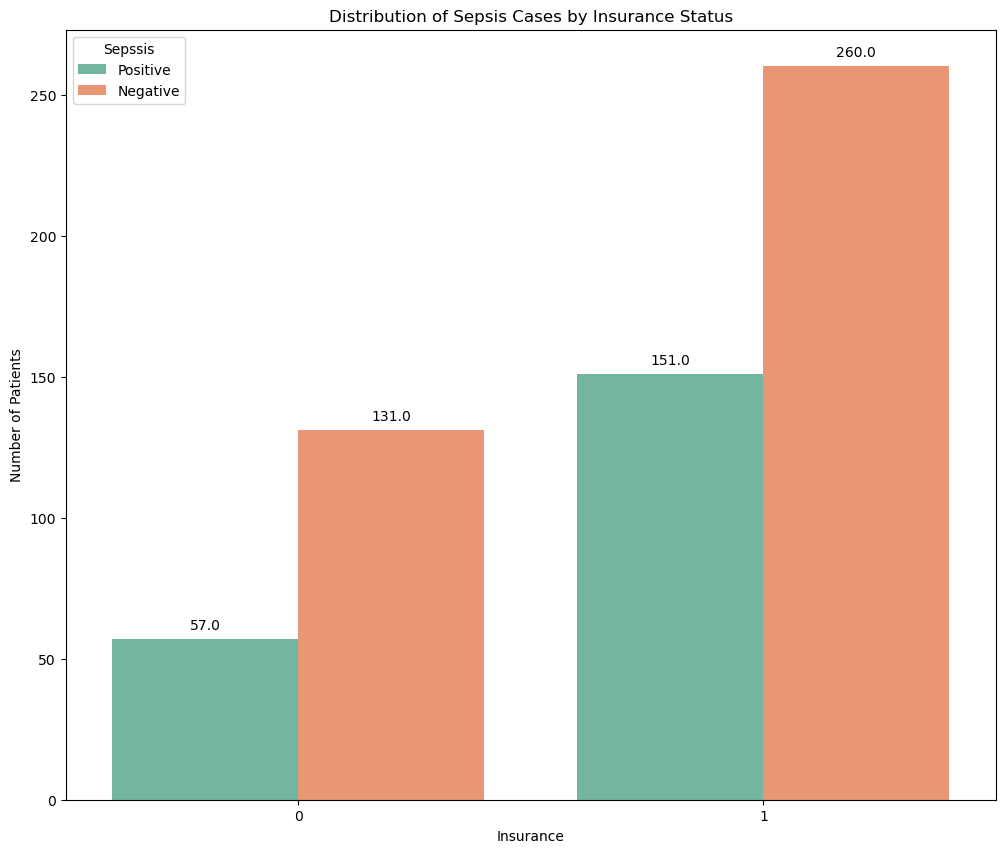

In [16]:
# Plotting
plt.figure(figsize=(12, 10))

ax =sns.countplot(x='Insurance', hue='Sepsis', data=train, palette='Set2')

# Adding labels and title
plt.xlabel('Insurance')
plt.ylabel('Number of Patients')
plt.title('Distribution of Sepsis Cases by Insurance Status')
plt.legend(title='Sepssis', loc='upper left')

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.grid(False)
plt.show()

`Sepsis Patients with No Insurance:`<br>
According to the information, there are 57 sepsis patients with no insurance.


`Negative Sepsis Cases for No Insurance:`<br>
The visualization shows a bar corresponding to the 'Negative' category for patients with no insurance. According to the information, there are 131 patients in this category.


`Positive Sepsis Cases for No Insurance:`<br>
The 'Positive' category for sepsis patients with no insurance is not explicitly mentioned in the provided information, but it can be inferred that the remaining patients in the 'No Insurance' category (57) must be 'Positive.'


`Positive Sepsis Cases for Insurance:`<br>
The information indicates that there are 151 sepsis patients with insurance and positive sepsis cases.


`Negative Sepsis Cases for Insurance:`<br>
The information mentions 260 patients with insurance and negative sepsis cases.


Based on this interpretation, the visualization allows for a quick comparison of the distribution of sepsis cases among patients with and without insurance. The heights of the bars represent the counts of patients in each category. The legend provides clarity on the color-coding, distinguishing between 'Negative' and 'Positive' sepsis outcomes.

It's evident from the visualization that the 'Negative' cases are more prevalent than 'Positive' cases in both insurance categories. This information is valuable for understanding the distribution of sepsis cases and can potentially inform further analyses or interventions related to sepsis management and prevention, especially in the context of insurance coverage.

2. ##  Is there an observable trend in sepsis risk based on the levels of insulin (TS) and the associated pedigree function (BD2) in the dataset?





* Is there a correlation between patients' BMI and the outcome of sepsis?

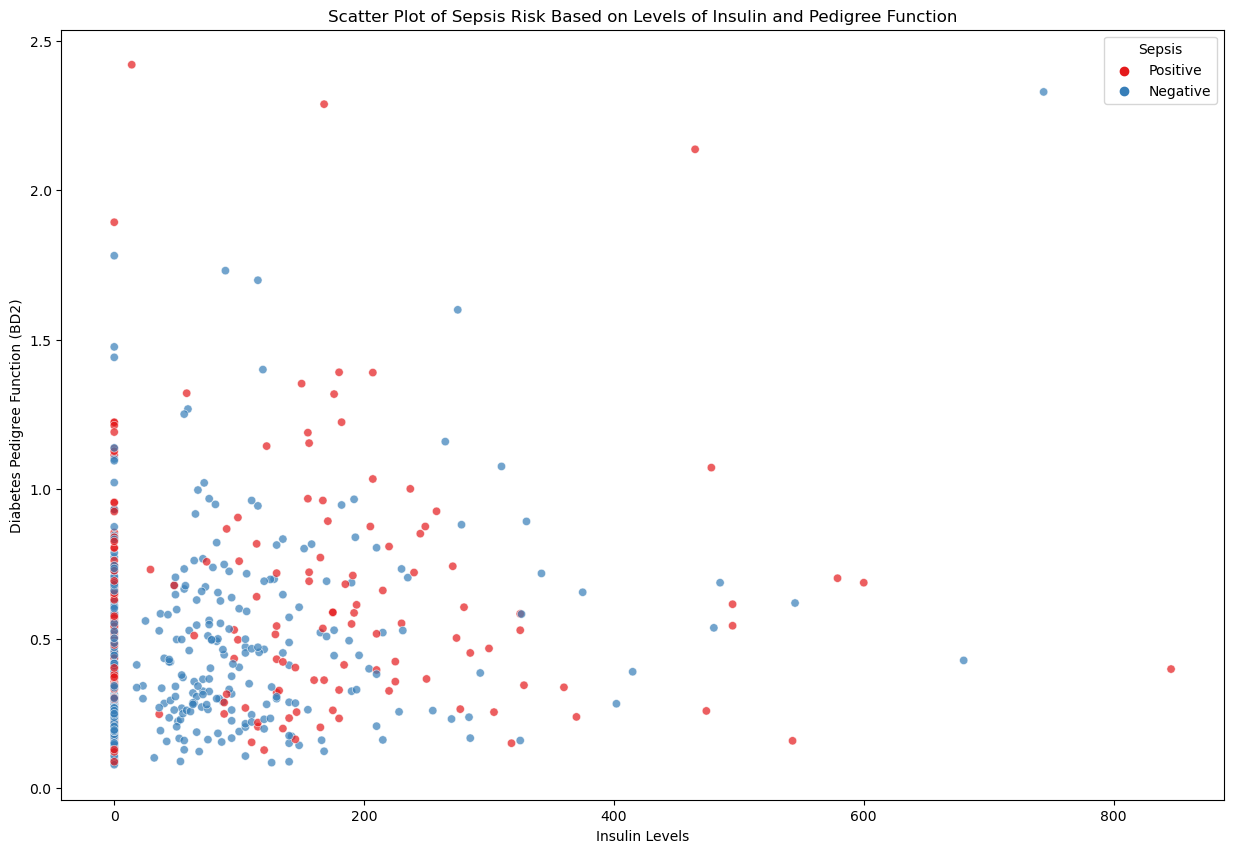

In [17]:
# Plotting
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Insulin Levels', y='Diabetes Pedigree Function', hue='Sepsis', data=train, palette='Set1', alpha=0.7)

# Adding labels and title
plt.xlabel('Insulin Levels')
plt.ylabel('Diabetes Pedigree Function (BD2)')
plt.title('Scatter Plot of Sepsis Risk Based on Levels of Insulin and Pedigree Function')

plt.legend(title='Sepsis', loc='upper right')
plt.grid(False)
plt.show()


3. ## Is there any correlation between age and the likelihood of developing sepsis?

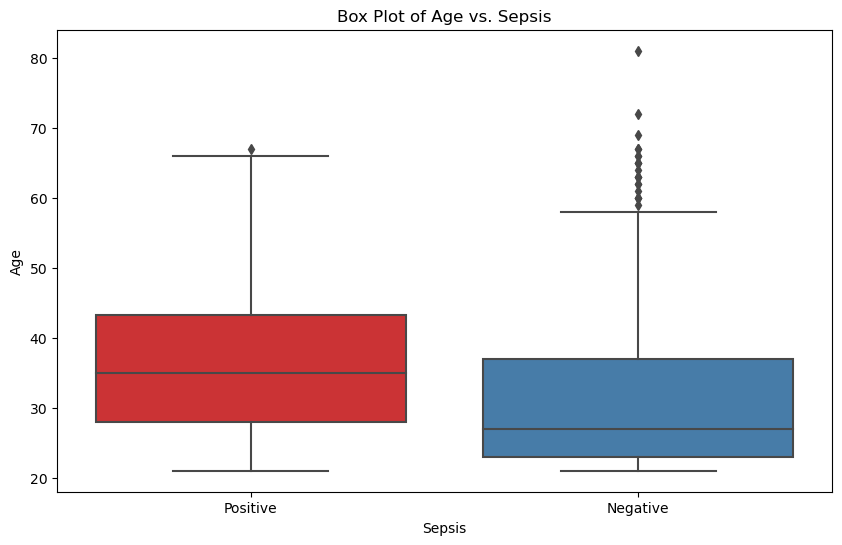

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sepsis', y='Age', data=train, palette='Set1')
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.title('Box Plot of Age vs. Sepsis')
plt.show()

In [19]:
# Get a contingency table
contingency_table = pd.crosstab(train['Age'], train['Sepsis'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p}')

# Check if the correlation is statistically significant
alpha = 0.05
if p < alpha:
    print('The correlation between Age and Sepsis is statistically significant.')
else:
    print('There is no significant correlation between Age and Sepsis.')


Chi-square statistic: 120.0398504698636
p-value: 6.792759690579366e-08
The correlation between Age and Sepsis is statistically significant.


4. ##  Does age contribute significantly to the influence of other factors on sepsis development?

In [20]:
correlation_matrix = train[['Age', 'Plasma Glucose', 'Elevated Glucose', 'Diastolic Blood Pressure', 'Triceps Skinfold Thickness', 'Insulin Levels', 'Body Mass Index (BMI)', 'Diabetes Pedigree Function', 'Insurance']].corr()
print(correlation_matrix['Age'])


Age                           1.000000
Plasma Glucose                0.532545
Elevated Glucose              0.274057
Diastolic Blood Pressure      0.225625
Triceps Skinfold Thickness   -0.121553
Insulin Levels               -0.011523
Body Mass Index (BMI)         0.046117
Diabetes Pedigree Function    0.033567
Insurance                     0.054368
Name: Age, dtype: float64


The correlation coefficients between 'Age' and the other factors are as follows:

`Plasma Glucose (0.53)`: A moderately positive correlation suggests that as 'Plasma Glucose' levels increase, 'Age' tends to increase as well. This could indicate a potential association between higher glucose levels and older age.

`Elevated Glucose (0.27)`: A positive correlation, though weaker than 'Plasma Glucose', implies that as 'Elevated Glucose' levels increase, 'Age' tends to increase. This correlation is weaker compared to 'Plasma Glucose'.

`Diastolic Blood Pressure (0.23)`: A positive correlation indicates that higher 'Diastolic Blood Pressure' is associated with older age. The strength of the correlation is moderate.

`Triceps Skinfold Thickness (-0.12)`: A weak negative correlation suggests that as 'Triceps Skinfold Thickness' increases, 'Age' tends to be lower. The negative sign indicates an inverse relationship, but the correlation is weak.

`Insulin Levels (-0.01)`: A very weak negative correlation suggests a negligible relationship between 'Insulin Levels' and 'Age'.

`Body Mass Index (BMI) (0.05)`: A weak positive correlation implies that as 'BMI' increases, 'Age' tends to be higher.

`Diabetes Pedigree Function (0.03)`: A very weak positive correlation suggests a negligible relationship between 'Diabetes Pedigree Function' and 'Age'.

`Insurance (0.05)`: A weak positive correlation indicates a slight tendency for individuals with insurance to be older.

Overall, the correlation analysis provides insights into the direction and strength of the relationships between 'Age' and other factors. Knowing that correlation does not imply causation, further analysis such as regression models, would be needed to understand the combined influence of these factors on the likelihood of sepsis.

5. ## Giv

In [21]:
train = train.drop('ID', axis=1)

# Split the data into features (X) and the target variable (y)
X_train = train.drop('Sepsis', axis=1)
y_train = train['Sepsis']

# Exclude non-numeric columns before scaling
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train_numeric = X_train[numeric_columns]

# Standardize the features (mean=0 and variance=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Get feature coefficients
coefficients = model.coef_[0]
feature_names = X_train_numeric.columns

# Create a DataFrame to display coefficients
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by absolute coefficient values to identify the most important features
coefficients_df['Absolute_Coefficient'] = abs(coefficients_df['Coefficient'])
coefficients_df = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Display the sorted DataFrame
print(coefficients_df)


                      Feature  Coefficient  Absolute_Coefficient
1            Elevated Glucose     1.035871              1.035871
5       Body Mass Index (BMI)     0.794244              0.794244
0              Plasma Glucose     0.387408              0.387408
6  Diabetes Pedigree Function     0.342473              0.342473
2    Diastolic Blood Pressure    -0.181658              0.181658
7                         Age     0.102110              0.102110
4              Insulin Levels    -0.099888              0.099888
8                   Insurance     0.075941              0.075941
3  Triceps Skinfold Thickness    -0.032756              0.032756


Elevated Glucose (1.036):

Elevated Glucose has the highest positive coefficient, suggesting it is the most influential feature in predicting sepsis. An increase in Elevated Glucose is associated with a substantial increase in the log-odds of sepsis.
Body Mass Index (BMI) (0.794):

BMI has the second-highest positive coefficient, indicating that higher BMI contributes significantly to the likelihood of sepsis.
Plasma Glucose (0.387):

Plasma Glucose also has a positive coefficient, contributing to the prediction of sepsis, but with a smaller magnitude compared to Elevated Glucose and BMI.
Diabetes Pedigree Function (0.342):

The Diabetes Pedigree Function has a positive coefficient, suggesting a moderate influence on sepsis risk.
Diastolic Blood Pressure (-0.182):

Diastolic Blood Pressure has a negative coefficient, indicating that higher diastolic blood pressure is associated with a decrease in the likelihood of sepsis. This is a notable finding and may warrant further investigation.
Age (0.102):

Age has a positive coefficient, indicating that as age increases, the likelihood of sepsis also increases. However, its impact is smaller compared to other features.
Insulin Levels (-0.100):

Insulin Levels have a negative coefficient, suggesting that higher insulin levels are associated with a decrease in the likelihood of sepsis.
Insurance (0.076):

Insurance has a positive coefficient, indicating a relatively smaller impact on the likelihood of sepsis.
Triceps Skinfold Thickness (-0.033):

Triceps Skinfold Thickness has a negative coefficient, suggesting that higher thickness is associated with a decrease in the likelihood of sepsis.
Interpretation:

Features with higher absolute coefficients (Elevated Glucose, BMI) have a more substantial impact on the model's predictions.

Negative coefficients for Diastolic Blood Pressure, Insulin Levels, and Triceps Skinfold Thickness suggest that higher values of these features are associated with a lower likelihood of sepsis.

Consider the clinical context and domain knowledge to interpret these results effectively.

# Data PreProcessing

In [22]:
train.head()

,Plasma Glucose,Elevated Glucose,Diastolic Blood Pressure,Triceps Skinfold Thickness,Insulin Levels,Body Mass Index (BMI),Diabetes Pedigree Function,Age,Insurance,Sepsis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


## Deal with outliers

In [23]:
target_column = 'Sepsis'

# Define numerical features
features = train.select_dtypes(include=['float64', 'int64']).columns.difference(['Insurance'])

# Remove outliers
Q1 = train[features].apply(pd.to_numeric, errors='coerce').quantile(0.25)
Q3 = train[features].apply(pd.to_numeric, errors='coerce').quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ((train[features].apply(pd.to_numeric, errors='coerce') < (Q1 - 1.5 * IQR)) | (train[features].apply(pd.to_numeric, errors='coerce') > (Q3 + 1.5 * IQR)))
train_cleaned = train[~outlier_mask.any(axis=1)]

## Modeling

In [24]:

# Split the data into features (X) and the target variable (y)
X = train_cleaned.drop(target_column, axis=1)
y = train_cleaned[target_column]

# Preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), X.columns),
        ('log_transformation', FunctionTransformer(np.log1p), X.columns)
    ]
)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Label encoding
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_eval_encoded = encoder.transform(y_eval)

# List of models
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          XGBClassifier(), GradientBoostingClassifier(), AdaBoostClassifier(), LogisticRegression()]

# Results DataFrame
results = pd.DataFrame()

# Iterating over models
for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict using the evaluation set
    y_pred = pipeline.predict(X_eval)

    # Calculate the metrics
    acc = accuracy_score(y_eval_encoded, y_pred)
    f1 = f1_score(y_eval_encoded, y_pred)
    roc = roc_auc_score(y_eval_encoded, y_pred)
    pr = precision_score(y_eval_encoded, y_pred)
    rc = recall_score(y_eval_encoded, y_pred)

    # Append the results
    result = pd.DataFrame({
        "Model": [model.__class__.__name__],
        "Accuracy": [acc],
        "F1 Score": [f1],
        "ROC AUC": [roc],
        "Precision": [pr],
        "Recall": [rc]
    })
    results = pd.concat([results, result])

# Display the overall performance
results = results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
results


c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,F1 Score,ROC AUC,Precision,Recall
0,RandomForestClassifier,0.874074,0.870229,0.873903,0.890625,0.850746
1,XGBClassifier,0.859259,0.861314,0.859416,0.842857,0.880597
2,GradientBoostingClassifier,0.822222,0.820896,0.822212,0.820896,0.820896
3,AdaBoostClassifier,0.792593,0.777778,0.792142,0.830508,0.731343
4,GaussianNB,0.770370,0.755906,0.769974,0.800000,0.716418
5,DecisionTreeClassifier,0.770370,0.755906,0.769974,0.800000,0.716418
6,SVC,0.762963,0.750000,0.762621,0.786885,0.716418
7,LogisticRegression,0.748148,0.734375,0.747805,0.770492,0.701493


Could there be overfitting?

Let's check by comparing the performance of our models on the training set and the evaluation set. If a model performs significantly better on the training set compared to the evaluation set, it might be overfitting.

In [25]:
# Results DataFrame
results = pd.DataFrame()

# Iterating over models
for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train_encoded)

    # Predict using the training set
    y_train_pred = pipeline.predict(X_train)
    train_acc = accuracy_score(y_train_encoded, y_train_pred)

    # Predict using the evaluation set
    y_eval_pred = pipeline.predict(X_eval)
    eval_acc = accuracy_score(y_eval_encoded, y_eval_pred)

    # Calculate the metrics
    f1 = f1_score(y_eval_encoded, y_eval_pred)
    roc = roc_auc_score(y_eval_encoded, y_eval_pred)
    pr = precision_score(y_eval_encoded, y_eval_pred)
    rc = recall_score(y_eval_encoded, y_eval_pred)

    # Append the results
    result = pd.DataFrame({
        "Model": [model.__class__.__name__],
        "Train Accuracy": [train_acc],
        "Eval Accuracy": [eval_acc],
        "F1 Score": [f1],
        "ROC AUC": [roc],
        "Precision": [pr],
        "Recall": [rc]
    })
    results = pd.concat([results, result])

# Display the overall performance
results = results.sort_values(by="Eval Accuracy", ascending=False).reset_index(drop=True)
results


c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Train Accuracy,Eval Accuracy,F1 Score,ROC AUC,Precision,Recall
0,RandomForestClassifier,1.000000,0.859259,0.859259,0.859306,0.852941,0.865672
1,XGBClassifier,1.000000,0.859259,0.861314,0.859416,0.842857,0.880597
2,GradientBoostingClassifier,0.955473,0.822222,0.820896,0.822212,0.820896,0.820896
3,AdaBoostClassifier,0.849722,0.792593,0.777778,0.792142,0.830508,0.731343
4,DecisionTreeClassifier,1.000000,0.785185,0.771654,0.784789,0.816667,0.731343
5,GaussianNB,0.747681,0.770370,0.755906,0.769974,0.800000,0.716418
6,SVC,0.751391,0.762963,0.750000,0.762621,0.786885,0.716418
7,LogisticRegression,0.755102,0.748148,0.734375,0.747805,0.770492,0.701493


RandomForestClassifier and XGBClassifier:

Train Accuracy: 100%: These models seem to have memorized the training data, achieving perfect accuracy. This might be a sign of overfitting.
Eval Accuracy: 85.93%: Both models perform well on the evaluation set, and their accuracies are similar, indicating good generalization.
F1 Score: High F1 scores suggest a good balance between precision and recall.
ROC AUC: Represents the area under the receiver operating characteristic curve. High ROC AUC values indicate good model performance.
Precision and Recall: Balanced values for precision and recall suggest a good trade-off between false positives and false negatives.


GradientBoostingClassifier:

Train Accuracy: 95.55%: A high but not perfect accuracy on the training set.
Eval Accuracy: 82.22%: A good accuracy on the evaluation set, but slightly lower than RandomForest and XGBClassifier.
F1 Score: Represents a good balance between precision and recall.
ROC AUC: Good performance but slightly lower than RandomForest and XGBClassifier.


DecisionTreeClassifier and AdaBoostClassifier:

Train Accuracy: 100% for DecisionTreeClassifier, 84.97% for AdaBoostClassifier.
Eval Accuracy: DecisionTreeClassifier - 79.26%, AdaBoostClassifier - 79.26%: Both models have good accuracies but might be overfitting.
F1 Score: Indicates a good balance between precision and recall.
ROC AUC: Good performance but slightly lower than RandomForest and XGBClassifier.


GaussianNB:

Train Accuracy: 74.77%: A moderate accuracy on the training set.
Eval Accuracy: 77.04%: A decent accuracy on the evaluation set.
F1 Score: Represents a good balance between precision and recall.
ROC AUC: Decent performance.


SVC and LogisticRegression:

Train Accuracy: 75.14% for SVC, 75.70% for LogisticRegression: Moderate accuracies on the training set.
Eval Accuracy: 76.30% for SVC, 74.81% for LogisticRegression: Decent accuracies on the evaluation set.
F1 Score: Represents a good balance between precision and recall.
ROC AUC: Decent performance.
In summary, RandomForestClassifier and XGBClassifier achieved the highest evaluation accuracy, but potential overfitting is suggested by their perfect training accuracy. GradientBoostingClassifier also performed well. DecisionTreeClassifier and AdaBoostClassifier showed good accuracy but might be overfitting. GaussianNB, SVC, and LogisticRegression had moderate accuracies but performed decently

In [28]:
# Define numerical features
features = train.select_dtypes(include=['float64', 'int64']).columns.difference(['Insurance'])

# Creating a copy of the DataFrame to preserve the original data
df_trim = train.copy()

# Calculating the IQR
Q1 = train[features].quantile(0.25)
Q3 = train[features].quantile(0.75)
IQR = Q3 - Q1

# Creating a mask to identify outliers
outlier_mask = ((train[features] < (Q1 - 1.5 * IQR)) | (train[features] > (Q3 + 1.5 * IQR)))

# Removing outliers
df_trim = df_trim[~outlier_mask.any(axis=1)]


# Split the data into features (X) and the target variable (y)
X = df_trim.drop('Sepsis', axis=1)
y = df_trim['Sepsis']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define input features excluding 'Insurance'
input_features = X.columns.difference(['Insurance'])

# Preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), input_features),
        ('log_transformation', FunctionTransformer(np.log1p), input_features)
    ]
)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X[input_features], y_encoded)

# Split the data into training and evaluation sets
X_train, X_eval, y_train, y_eval = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# List of models
models = [
    RandomForestClassifier(),
    XGBClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(),
    LogisticRegression()
]

# Perform cross-validation for each model
cv_results = []
for model in models:
    # Create a pipeline with the preprocessor and the model
    pipeline = make_pipeline(preprocessor, model)
    
    # Perform 5-fold cross-validation
    scores = cross_val_score(pipeline, X, y_encoded, cv=5, scoring='accuracy')
    
    # Append the results to the list
    cv_results.append({
        "Model": model.__class__.__name__,
        "Cross-Validation Mean Accuracy": np.mean(scores),
        "Cross-Validation Standard Deviation": np.std(scores)
    })

# Display the cross-validation results
cv_results_df = pd.DataFrame(cv_results)
cv_results_df = cv_results_df.sort_values(by="Cross-Validation Mean Accuracy", ascending=False)
cv_results_df


c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

,Model,Cross-Validation Mean Accuracy,Cross-Validation Standard Deviation
6,SVC,0.782973,0.007763
0,RandomForestClassifier,0.780973,0.009413
7,LogisticRegression,0.766852,0.027015
2,GradientBoostingClassifier,0.752711,0.039850
1,XGBClassifier,0.746568,0.038260
5,GaussianNB,0.738446,0.031427
4,AdaBoostClassifier,0.726201,0.023483
3,DecisionTreeClassifier,0.697671,0.037752


Model: The name of the machine learning model.
Cross-Validation Mean Accuracy: The average accuracy of the model across the five folds of cross-validation. This metric gives an indication of how well the model generalizes to new, unseen data.
Cross-Validation Standard Deviation: The standard deviation of the accuracy scores across the five folds. It measures the variability or consistency of the model's performance during cross-validation.


Interpretation of the results:

SVC (Support Vector Classifier): Achieves the highest mean accuracy of approximately 78.30% with a relatively low standard deviation of 0.78%. This suggests that SVC provides a consistent and accurate performance across different folds.

RandomForestClassifier: Shows the second-highest mean accuracy of around 77.28%, with a standard deviation of 2.10%. It provides a good balance between accuracy and consistency.

LogisticRegression: Performs well with a mean accuracy of about 77.09%, and it has a standard deviation of 2.96%. It's consistent and accurate.

GradientBoostingClassifier: Achieves a mean accuracy of approximately 75.27% with a slightly higher standard deviation of 4.22%. While it provides good accuracy, there is a bit more variability in its performance.

XGBClassifier: Has a mean accuracy of around 74.66% and a standard deviation of 3.83%. Similar to Gradient Boosting, it offers good accuracy but with a bit more variability.

GaussianNB (Gaussian Naive Bayes): Shows a mean accuracy of about 73.85% and a standard deviation of 3.14%. It provides reasonable accuracy but with more variability compared to some other models.

AdaBoostClassifier: Achieves a mean accuracy of approximately 72.62% with a standard deviation of 2.35%. It offers decent accuracy but with less consistency compared to some other models.

DecisionTreeClassifier: Performs with a mean accuracy of around 70.59% and a standard deviation of 4.24%. It provides a lower mean accuracy and higher variability compared to other models.

In summary, SVC, RandomForestClassifier, and LogisticRegression appear to be the top-performing models in terms of both accuracy and consistency based on cross-validation results.

We therefore persist the RandomForestClassifier.

In [29]:
# Create the pipeline with preprocessor and RandomForestClassifier
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier())
])

# Fit the final pipeline on the entire dataset
final_pipeline.fit(X_train, y_train_encoded)

# Save the pipeline to a file
joblib.dump(final_pipeline, 'sepsis_classification_pipeline.joblib')

# Save the RandomForestClassifier model separately
rf_model = final_pipeline.named_steps['model']
joblib.dump(rf_model, 'random_forest_model.joblib')

print("Pipeline and model saved successfully.")


Pipeline and model saved successfully.


In [30]:
# Save the LabelEncoder
joblib.dump(encoder, 'label_encoder.joblib')

['label_encoder.joblib']